In [1]:
# データのインポート ※欠損値を対処するアルゴリズムが入っているので欠損値の処理は不要
import pandas as pd
import seaborn as sns
 
df = sns.load_dataset('titanic')
# df = df.dropna()
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']

In [2]:
# テストデータと訓練データに分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
pip install xgboost

     |████████████████████████████████| 1.8 MB 8.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
# xgboostモデルのインスタンスを作成、early_stopping_roundsは最低限ブースティングのイテレーションをする回数を指定
from xgboost import XGBClassifier
model = XGBClassifier(early_stopping_rounds=1000)

In [14]:
# 学習させる
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.56308
[1]	validation_0-logloss:0.49282
[2]	validation_0-logloss:0.45124
[3]	validation_0-logloss:0.42758
[4]	validation_0-logloss:0.41048
[5]	validation_0-logloss:0.40525
[6]	validation_0-logloss:0.40054
[7]	validation_0-logloss:0.39620
[8]	validation_0-logloss:0.39846
[9]	validation_0-logloss:0.39879
[10]	validation_0-logloss:0.40054
[11]	validation_0-logloss:0.40066
[12]	validation_0-logloss:0.40127
[13]	validation_0-logloss:0.40179
[14]	validation_0-logloss:0.39987
[15]	validation_0-logloss:0.40512
[16]	validation_0-logloss:0.40603
[17]	validation_0-logloss:0.40613
[18]	validation_0-logloss:0.40839
[19]	validation_0-logloss:0.40882
[20]	validation_0-logloss:0.40712
[21]	validation_0-logloss:0.40864
[22]	validation_0-logloss:0.41076
[23]	validation_0-logloss:0.41028
[24]	validation_0-logloss:0.41041
[25]	validation_0-logloss:0.41108
[26]	validation_0-logloss:0.41435
[27]	validation_0-logloss:0.41702
[28]	validation_0-logloss:0.41910
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=1000, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [15]:
# 予測LogLoss値を評価（目的変数と確率との差）
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.39620276070686417

<BarContainer object of 22 artists>

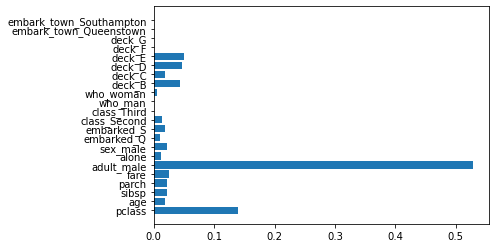

In [16]:
# 重要な特徴量可視化
import matplotlib.pyplot as plt
model.feature_importances_
plt.barh(X.columns, model.feature_importances_)